In [98]:
import pandas as pd

In [99]:
from datetime import datetime

In [100]:
import numpy as np

In [101]:
import matplotlib

In [102]:
import matplotlib.pyplot as plt

In [103]:
%matplotlib inline

In [104]:
df = pd.read_csv('NursingData.csv')

In [105]:
headers = list(df.columns.values)

In [106]:
newhead = []

In [107]:
for name in headers:
    newhead.append(name.strip())

In [108]:
newhead

['#',
 'time',
 'Left',
 'Right',
 'Bottle',
 'Bottle Amount',
 'Sleep time',
 'wet',
 'solid',
 'Pump Amount']

In [109]:
df.columns = newhead

In [110]:
df[:8]

,#,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount
0,1,06/21/15 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN
1,2,06/21/15 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN
2,3,06/21/15 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN
3,4,06/21/15 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN
4,5,06/21/15 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN
5,6,06/21/15 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN
6,7,06/21/15 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN
7,8,06/21/15 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN


In [111]:
df.dtypes

#                 int64
time             object
Left             object
Right            object
Bottle           object
Bottle Amount    object
Sleep time       object
wet              object
solid            object
Pump Amount      object
dtype: object

In [112]:
df['time'] = pd.to_datetime(df['time'])

In [113]:
ordered = df.sort_values('time')

In [114]:
ordered[:8]

,#,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount
3234,1,2015-05-31 00:48:35,,,,,,O,-,NaN
0,1,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN
3235,2,2015-06-21 01:17:27,,,,,,O,O,NaN
2560,1,2015-06-21 01:19:50,,,,,0:39:28,NaN,NaN,NaN
1,2,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN
2561,2,2015-06-21 02:08:15,,,,,0:29:40,NaN,NaN,NaN
2,3,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN
2562,3,2015-06-21 02:52:03,,,,,1:30:3,NaN,NaN,NaN


In [115]:
def convmmss(mmss):
    minlist = []
    for value in mmss:
        if len(value) == 1:
            value = [float('NaN'),float('NaN')]
        else:
            if int(value[1]) < 10:
                value[1] = value[1] + '0'
        minutes = float(value[0]) + float(value[1])/60.
        minlist.append(minutes)
    minarr = np.array(minlist)
    return minarr

In [116]:
leftmin = convmmss(df['Left'].str.split(':'))

In [117]:
leftadj = np.where(leftmin > 45, 15., leftmin)

In [118]:
rightmin = convmmss(df['Right'].str.split(':'))

In [119]:
rightadj = np.where(rightmin > 45, 15., rightmin)

In [120]:
bottime = np.where(df['Bottle'] == ' Bottle-Pump',5.,0.)

In [121]:
bottime[1000:1200]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
        0.,  0.,  0.,  0.,  5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,
        0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  5.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [122]:
totfeed = leftmin + rightmin + bottime

In [123]:
totadj = leftadj + rightadj + bottime

In [124]:
totfeed[1000:1050]

array([  15.        ,   23.61666667,   67.25      ,   11.48333333,
         17.95      ,   21.3       ,  101.43333333,   15.        ,
         19.76666667,   15.        ,    5.        ,   15.9       ,
         15.        ,   15.        ,   20.66666667,   15.        ,
         15.        ,   15.41666667,   14.5       ,   15.        ,
         13.16666667,   26.43333333,   11.46666667,   30.        ,
          9.51666667,   15.        ,   15.        ,   24.98333333,
         20.        ,   22.21666667,   19.35      ,   15.        ,
         15.        ,   15.        ,   15.        ,   17.8       ,
         16.25      ,    8.61666667,   16.61666667,   17.2       ,
         12.83333333,   11.9       ,   15.        ,   17.71666667,
         17.66666667,   15.        ,   15.        ,   15.        ,
         19.33333333,   15.        ])

In [125]:
df.loc[:,'Total Feed'] = pd.Series(totadj, index = df.index)

In [140]:
del df['#']

In [127]:
#df = df.drop('#',axis=1,inplace = True)

In [141]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,Month,Year
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,06,2015
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,06,2015
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,06,2015
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,06,2015
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,06,2015
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,06,2015
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,06,2015
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,06,2015


In [128]:
df['time'][0].strftime('%Y')

'2015'

In [129]:
month = []

In [130]:
year = []

In [131]:
for times in df['time']:
    month.append(times.strftime('%m'))
    year.append(times.strftime('%Y'))

In [132]:
df['Month'] = month

In [133]:
df['Year'] = year

In [142]:
monthly = df.groupby([df['Year'],df['Month']])

In [143]:
monthly.mean()

Total Feed
Year Month            
2015 05            NaN
     06      17.883868
     07      17.367562
     08      17.109870
     09      17.498765
     10      16.128008
     11      14.943805
     12      15.042160
2016 01      15.609127

In [136]:
monthly.describe()

#  Total Feed
Year Month                               
2015 05    count     1.000000    0.000000
           mean      1.000000         NaN
           std            NaN         NaN
           min       1.000000         NaN
           25%       1.000000         NaN
           50%       1.000000         NaN
           75%       1.000000         NaN
           max       1.000000         NaN
     06    count   187.000000  156.000000
           mean     67.839572   17.883868
           std      47.836032    8.285943
           min       1.000000    1.300000
           25%      23.000000   12.500000
           50%      63.000000   15.416667
           75%     109.500000   20.762500
           max     156.000000   57.600000
     07    count   430.000000  428.000000
           mean    368.918605   17.367562
           std     125.563087    8.440938
           min      30.000000    0.333333
           25%     262.250000   12.437500
           50%     369.500000   15.000000
           75%     476.750000   20.000000
           max     584.000000   50.000000
     08    count   435.000000  385.000000
           mean    690.965517   17.109870
           std     260.974355    8.253485
           min       4.000000    0.000000
           25%     643.500000   13.316667
           50%     752.000000   15.000000
...                       ...         ...
     10    std     557.588869    7.132335
           min      33.000000    0.500000
           25%     300.750000   11.654167
           50%    1393.500000   15.000000
           75%    1512.250000   19.791667
           max    1631.000000   42.850000
     11    count   465.000000  339.000000
           mean   1416.632258   14.943805
           std     636.945618    7.202140
           min     320.000000    0.166667
           25%     436.000000    9.666667
           50%    1738.000000   15.000000
           75%    1854.000000   18.000000
           max    1970.000000   42.166667
     12    count   469.000000  338.000000
           mean   1684.631130   15.042160
           std     736.386435    7.722023
           min     446.000000    1.450000
           25%     563.000000   10.350000
           50%    2074.000000   15.000000
           75%    2191.000000   16.175000
           max    2308.000000   56.983333
2016 01    count   350.000000  252.000000
           mean   1927.980000   15.609127
           std     815.884997    5.636214
           min     577.000000    0.000000
           25%     664.250000   13.366667
           50%    2385.500000   15.000000
           75%    2472.750000   16.929167
           max    2560.000000   37.416667

[72 rows x 2 columns]

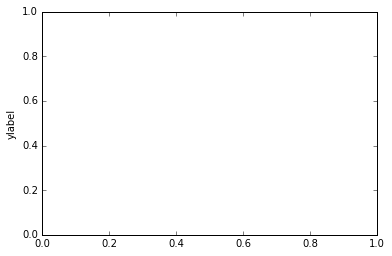

In [188]:
fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.set_title=("Average Length of Feeding Time")
ax.set_ylabel('ylabel')


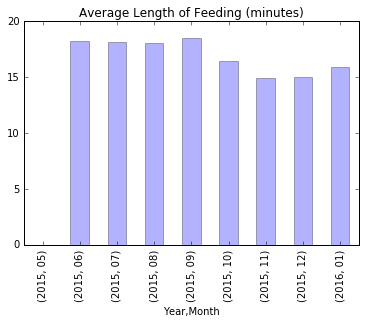

In [197]:
monthly_rm15['Total Feed'].mean().plot(kind='bar',color='b',alpha=0.3)
plt.title('Average Length of Feeding (minutes)')

In [164]:
rm15 = df[df['Total Feed'] != 15.]

In [165]:
monthly_rm15 = rm15.groupby([df['Year'],df['Month']])

In [173]:
df['time'][10].strftime('%H')

'11'

In [214]:
timeofday = []

In [215]:
for time in df['time']:
    if int(time.strftime('%H')) <= 6:
        timeofday.append('Late night')
    elif 6 < int(time.strftime('%H')) <= 12:
        timeofday.append('Morning')
    elif 12 < int(time.strftime('%H')) <= 18:
        timeofday.append('Afternoon')
    elif 18 <= int(time.strftime('%H')):
        timeofday.append('Evening')

In [216]:
df['Time of Day'] = timeofday

In [217]:
df[:8]

,time,Left,Right,Bottle,Bottle Amount,Sleep time,wet,solid,Pump Amount,Total Feed,Month,Year,Time of Day
0,2015-06-21 01:17:09,0:0,1:18,0:0,,NaN,NaN,NaN,NaN,1.300000,06,2015,Late night
1,2015-06-21 02:00:39,7:31,0:0,0:0,,NaN,NaN,NaN,NaN,7.516667,06,2015,Late night
2,2015-06-21 02:37:57,14:3,0:0,0:0,,NaN,NaN,NaN,NaN,14.500000,06,2015,Late night
3,2015-06-21 05:23:55,0:0,20:0,0:0,,NaN,NaN,NaN,NaN,20.000000,06,2015,Late night
4,2015-06-21 05:47:59,22:11,0:0,0:0,,NaN,NaN,NaN,NaN,22.183333,06,2015,Late night
5,2015-06-21 06:24:35,0:0,15:50,0:0,,NaN,NaN,NaN,NaN,15.833333,06,2015,Late night
6,2015-06-21 07:50:08,13:37,0:0,0:0,,NaN,NaN,NaN,NaN,13.616667,06,2015,Morning
7,2015-06-21 08:44:12,0:0,9:40,0:0,,NaN,NaN,NaN,NaN,9.666667,06,2015,Morning


In [203]:
daytime = df.groupby("Time of Day")

In [222]:
data = pd.Series(df['Time of Day'], index = ['Morning','Afternoon','Evening','Late night'])

In [223]:
data.value_counts()

Series([], Name: Time of Day, dtype: int64)

AttributeError: Unknown property index

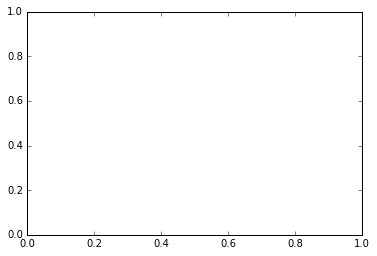

In [221]:
data.value_counts().plot(kind='barh',index = ['Morning','Afternoon','Evening','Late night'])